## Начало лабораторной работы

1. Цены на кофе (12 варик)
2. Цены на акции (13 варик)
3. Цены на золото (14 варик)

Цены на кофе

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/Starbucks.csv")

print(df.columns, "\n")

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 



Столбцы на русском

1. date: Дата
2. open: Цена открытия
3. high: Самая высокая цена дня
4. low: Самая низкая цена дня
5. Close: Цена закрытия
6. Adj Close: Скорректированная цена закрытия
7. Volume: Объем торгов

Проблемная область: Прогнозирование динамики цен акций Starbucks на основе исторических данных о ценах и объемах торгов.


In [11]:
print(df.info, "\n")

<bound method DataFrame.info of             Date       Open       High        Low      Close  Adj Close  \
0     1992-06-26   0.328125   0.347656   0.320313   0.335938   0.260703   
1     1992-06-29   0.339844   0.367188   0.332031   0.359375   0.278891   
2     1992-06-30   0.367188   0.371094   0.343750   0.347656   0.269797   
3     1992-07-01   0.351563   0.359375   0.339844   0.355469   0.275860   
4     1992-07-02   0.359375   0.359375   0.347656   0.355469   0.275860   
...          ...        ...        ...        ...        ...        ...   
8031  2024-05-17  75.269997  78.000000  74.919998  77.849998  77.849998   
8032  2024-05-20  77.680000  78.320000  76.709999  77.540001  77.540001   
8033  2024-05-21  77.559998  78.220001  77.500000  77.720001  77.720001   
8034  2024-05-22  77.699997  81.019997  77.440002  80.720001  80.720001   
8035  2024-05-23  80.099998  80.699997  79.169998  79.260002  79.260002   

         Volume  
0     224358400  
1      58732800  
2      347776

Объектом наблюдения является - цена акций Starbucks <br>
Атрибуты — содержит набор информации о ценах акций Starbucks, такие как: дата, цена открытия, максимальная цена дня, минимальная цена дня, цена закрытия, скорректированная цена закрытия и объем торгов.

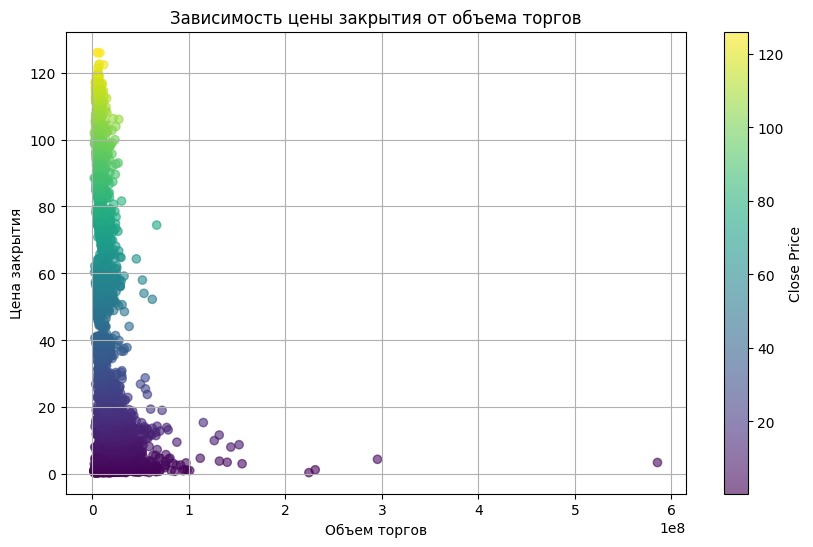

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df['Volume'], df['Close'], c=df['Close'], alpha=0.6)
plt.colorbar(label='Close Price')

plt.title("Зависимость цены закрытия от объема торгов")
plt.ylabel("Цена закрытия")
plt.xlabel("Объем торгов")
plt.grid(visible=True)

plt.show()

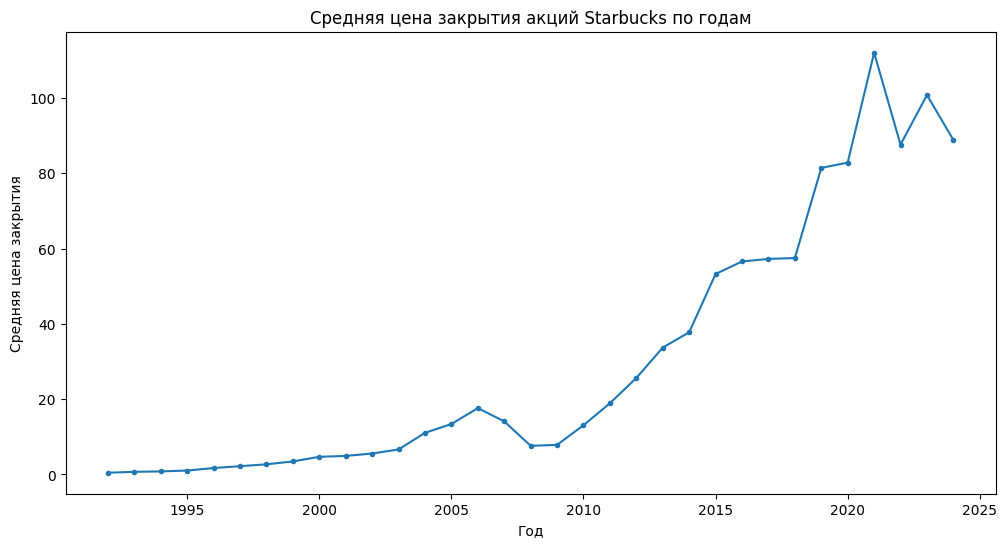

In [14]:
import matplotlib.pyplot as plt

df['Year'] = pd.to_datetime(df['Date']).dt.year

year_close = df.groupby('Year')['Close'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(year_close['Year'], year_close['Close'], marker='.')

plt.title("Средняя цена закрытия акций Starbucks по годам")
plt.xlabel("Год")
plt.ylabel("Средняя цена закрытия")

plt.show()


Связь между объектами есть. Цена связана почти со всеми характеристиками акций. Например, на графике номер один показана зависимость между ценой закрытия и объемом торгов. А на графике номер два показана зависимость средней цены закрытия от года.

<h3>Примеры бизнес-целей</h3>

1. Прогнозирование динамики цен акций Starbucks на основе исторических данных о ценах и объемах торгов.
2. Наблюдение за изменениями цен акций Starbucks с годами.

Эффект для бизнеса: Оценка и оптимизация цен, оценка и планирование затрат, выявление тенденций на рынке, стратегия планирования.


<h3>Цели технического проекта</h3>
<ul>Для первой цели:</ul>
    <li>Вход: Исторические данные о ценах и объемах торгов</li>
    <li>Целевой признак: Цена закрытия.</li>
<ul>Для второй цели:</ul>
    <li>Вход: Исторические данные о ценах и объемах торгов</li>
    <li>Целевой признак: Год</li>


<h3>Код ниже нужен для определения проблем данных</h3>

In [15]:
import pandas as pd

max_value = df.max(axis=0)

columns_with_zero = df.columns[(df == 0).any()]

numeric_data = df.select_dtypes(include='number')
shum = numeric_data.var()
low_dispers = 0.1
low_var_columns = shum[shum < low_dispers]

df['Year'] = pd.to_datetime(df['Date']).dt.year
print("Максимальные значения:\n", max_value, "\n")
print("Столбцы с нулевыми значениями:\n", columns_with_zero, "\n")
print("Признаки с низкой дисперсией:\n", low_var_columns, "\n")
print("Годы:\n", df['Year'])


Максимальные значения:
 Date         2024-05-23
Open         126.080002
High             126.32
Low          124.809998
Close        126.059998
Adj Close    118.010414
Volume        585508800
Year               2024
dtype: object 

Столбцы с нулевыми значениями:
 Index([], dtype='object') 

Признаки с низкой дисперсией:
 Series([], dtype: float64) 

Годы:
 0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
8031    2024
8032    2024
8033    2024
8034    2024
8035    2024
Name: Year, Length: 8036, dtype: int32


<h4>Из полученных данных выяснилось:</h4></ul> <li>Столбцы с нулевыми значениями отсутствуют, что указывает на полноту данных и отсутствие проблем с пропущенными значениями.</li> <li>Максимальные значения для различных метрик: <ul> <li>Date: 2024-05-23</li> <li>Open: 126.080002</li> <li>High: 126.32</li> <li>Low: 124.809998</li> <li>Close: 126.059998</li> <li>Adj Close: 118.010414</li> <li>Volume: 585508800</li> <li>Year: 2024</li> </ul> </li> <li>Признаки с низкой дисперсией отсутствуют, что указывает на стабильность данных и отсутствие проблем с зашумленностью.</li> <li>Годы варьируются от 1992 до 2024. Это может быть актуальной информацией для анализа временных трендов и изменений в данных за длительный период. Однако, если данные включают будущие даты (например, 2024 год), это может указывать на проблему с актуальностью данных или просачивание данных.</li> <li>Выбросы: Максимальные значения для некоторых метрик (например, Volume) могут указывать на наличие выбросов, которые могут искажать анализ и моделирование.</li> <li>Смещение: Отсутствие столбцов с нулевыми значениями и признаков с низкой дисперсией указывает на отсутствие явных проблем со смещением данных. Однако, для более точного анализа смещения необходимо провести дополнительные исследования, такие как сравнение распределений признаков в тренировочном и тестовом наборах данных.</li> <li>Просачивание данных: Наличие будущих дат (например, 2024 год) может указывать на проблему с просачиванием данных, если эти данные используются для прогнозирования будущих событий. Это может привести к некорректным результатам моделирования.</li>

<ol><h3>Примеры решения проблем для набора данных</h3></ol>
    <li>Удаление выбросов на основе значения или Volume</li>
    <li>Удаление или обновить устаревшие даты, так как наличие будущих дат может указывать на проблему с актуальностью данных</li>



<h3>Оценка качества данных</h3>
1. Информативность. Набор данных предоставляет достаточную информацию для анализа цен на недвижимость.
2. Степень покрытия. Набор данных затрагивает только один райно, не включая информацию о других райнов.
3. Соответствие реальным данным. Данные вполне кажутся реальными, не считая некоторых редких выбросов.
4. Согласованность меток. Метки состояние и оценка вида, имеют четкие значения.

<h3>Разбиение данных на обучающую, контрольную и тестовую выборки</h3>

In [17]:
df_numeric = df.select_dtypes(include='number')

x = df_numeric.drop(['Close'], axis=1)
y = df_numeric['Close']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=14)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=14)

print(f"Исходный размер строк: {df_numeric.shape[0]} строк")
print(f"Размер обучающей выборки: {x_train.shape[0]} строк")
print(f"Размер валидационной выборки: {x_val.shape[0]} строк")
print(f"Размер тестовой выборки: {x_test.shape[0]} строк")


Исходный размер строк: 8036 строк
Размер обучающей выборки: 5625 строк
Размер валидационной выборки: 1205 строк
Размер тестовой выборки: 1206 строк


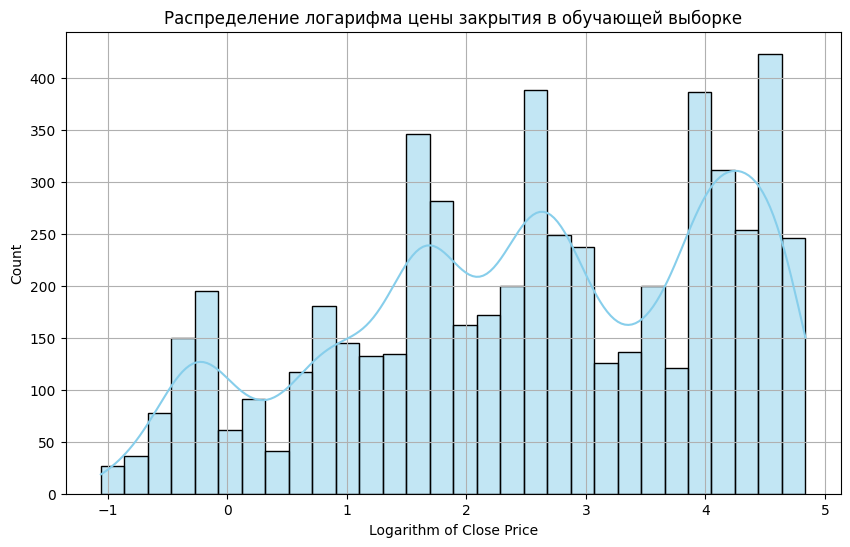

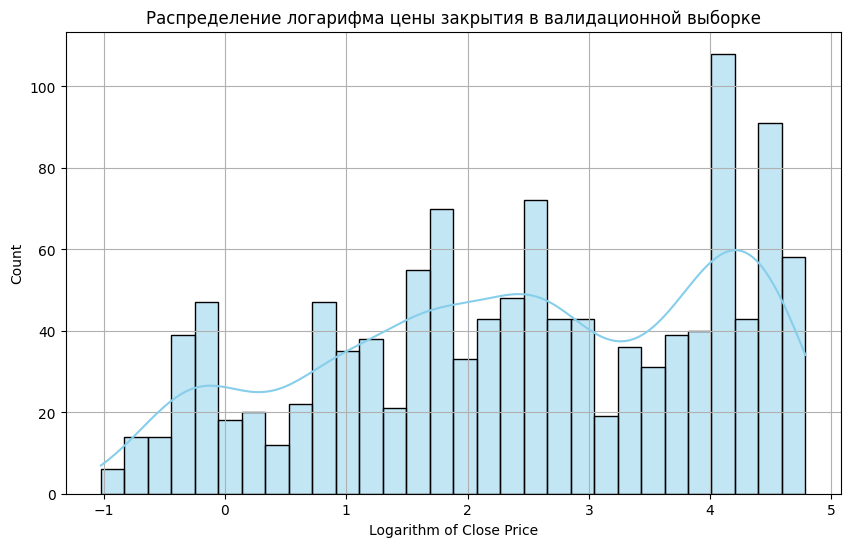

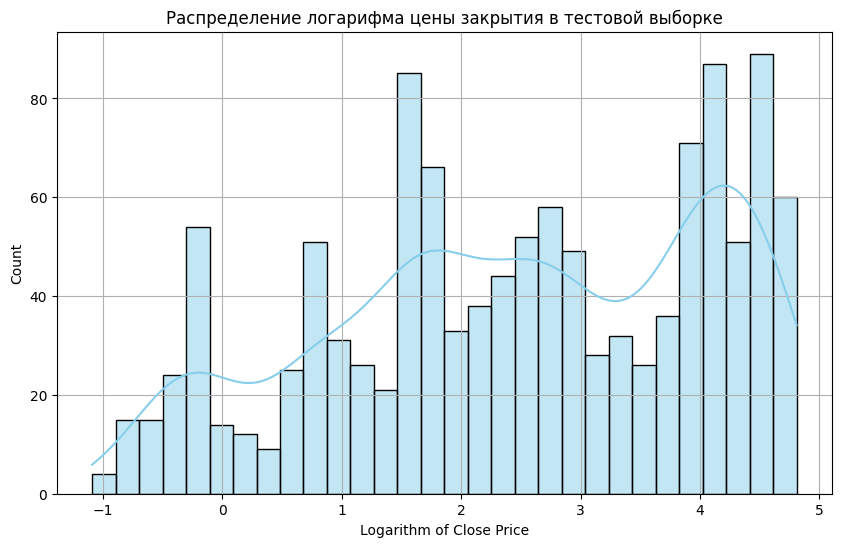

Статистические показатели для обучающей выборки:
Среднее значение: 2.53
Стандартное отклонение: 1.54
Минимальное значение: -1.06
Максимальное значение: 4.84
Количество наблюдений: 5625

Статистические показатели для валидационной выборки:
Среднее значение: 2.44
Стандартное отклонение: 1.58
Минимальное значение: -1.02
Максимальное значение: 4.79
Количество наблюдений: 1205

Статистические показатели для тестовой выборки:
Среднее значение: 2.49
Стандартное отклонение: 1.57
Минимальное значение: -1.09
Максимальное значение: 4.81
Количество наблюдений: 1206



In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Логарифмирование целевой переменной
df['Close_log'] = np.log(df['Close'])

# Выбор признаков и целевой переменной
X = df.drop(['Close', 'Close_log'], axis=1)
y = df['Close_log']

# Выбор только числовых признаков
X = X.select_dtypes(include='number')

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Функция для построения гистограммы распределения целевого признака
def plot_distribution(data, title):
    """Построение гистограммы распределения целевого признака"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(title)
    plt.xlabel('Logarithm of Close Price')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Построение гистограмм распределения целевого признака
plot_distribution(y_train, 'Распределение логарифма цены закрытия в обучающей выборке')
plot_distribution(y_val, 'Распределение логарифма цены закрытия в валидационной выборке')
plot_distribution(y_test, 'Распределение логарифма цены закрытия в тестовой выборке')

# Функция для вывода статистических показателей
def get_statistics(df, name):
    print(f"Статистические показатели для {name} выборки:")
    print(f"Среднее значение: {df.mean():.2f}")
    print(f"Стандартное отклонение: {df.std():.2f}")
    print(f"Минимальное значение: {df.min():.2f}")
    print(f"Максимальное значение: {df.max():.2f}")
    print(f"Количество наблюдений: {df.count()}\n")

# Вывод статистических показателей для обучающей, валидационной и тестовой выборок
get_statistics(y_train, "обучающей")
get_statistics(y_val, "валидационной")
get_statistics(y_test, "тестовой")


<h3>Oversampling и undersampling</h3>

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Проверка наличия столбца 'Date' и создание столбца 'Year'
if 'Date' in df.columns:
    df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
    df = df.drop(['Date'], axis=1)

# Логарифмирование целевой переменной
df['Close_log'] = np.log(df['Close'])

# Создание категорий для целевой переменной
df['Close_category'] = pd.qcut(df['Close_log'], q=5, labels=[0, 1, 2, 3, 4])

# Выбор признаков и целевой переменной
X = df.drop(['Close', 'Close_log', 'Close_category'], axis=1)
y = df['Close_category']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Применение SMOTE для oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())

# Применение RandomUnderSampler для undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Распределение классов после RandomUnderSampler (undersampling):")
print(pd.Series(y_train_under).value_counts())


Распределение классов после SMOTE (oversampling):
Close_category
0    1157
1    1157
2    1157
3    1157
4    1157
Name: count, dtype: int64
Распределение классов после RandomUnderSampler (undersampling):
Close_category
0    1092
1    1092
2    1092
3    1092
4    1092
Name: count, dtype: int64


<h3>Оценка сбалансированности выборок</h3>

Оценка необходимости аугментации данных

In [28]:
import numpy as np
import pandas as pd

def check_augmentation_need(data, name):
    """Проверка необходимости аугментации данных"""
    # Проверка на наличие числовых значений
    if isinstance(data.dtype, pd.CategoricalDtype):
        print(f"Данные в выборке {name} являются категориальными.")
        return
    elif not np.issubdtype(data.dtype, np.number):
        print(f"Данные в выборке {name} не являются числовыми.")
        return

    # Проверка на наличие пустых значений
    if data.isnull().any():
        print(f"Выборка {name} содержит пустые значения.")
        return

    quantiles = data.quantile([0.25, 0.5, 0.75])
    mean = data.mean()
    std = data.std()

    print(f"Проверка необходимости аугментации для {name} выборки:")
    print(f"Среднее значение: {mean:.2f}, Стандартное отклонение: {std:.2f}")
    print(f"25-й квантиль: {quantiles[0.25]:.2f}")
    print(f"50-й квантиль (медиана): {quantiles[0.5]:.2f}")
    print(f"75-й квантиль: {quantiles[0.75]:.2f}")

    if std > mean * 0.5:
        print(f"Выборка {name} несбалансирована, рекомендуется аугментация.\n")
    else:
        print(f"Выборка {name} сбалансирована, аугментация не требуется.\n")

# Пример использования функции
# y_train, y_val, y_test должны быть определены заранее
check_augmentation_need(y_train, "обучающей")
check_augmentation_need(y_val, "валидационной")
check_augmentation_need(y_test, "тестовой")


Данные в выборке обучающей являются категориальными.
Проверка необходимости аугментации для валидационной выборки:
Среднее значение: 2.44, Стандартное отклонение: 1.58
25-й квантиль: 1.20
50-й квантиль (медиана): 2.53
75-й квантиль: 4.01
Выборка валидационной несбалансирована, рекомендуется аугментация.

Данные в выборке тестовой являются категориальными.


Поскольку выборка валидационной несбалансирована и демонстрирует значительный разброс значений, что подтверждается квантилями и стандартным отклонением, применение методов аугментации рекомендуется для улучшения сбалансированности и качества модели.

Распределение 'Close_category' в обучающей выборке:
 Close_category
2    1157
4    1134
1    1126
3    1116
0    1092
Name: count, dtype: int64


C:\Users\TIGR228\AppData\Local\Temp\ipykernel_21436\2926621768.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


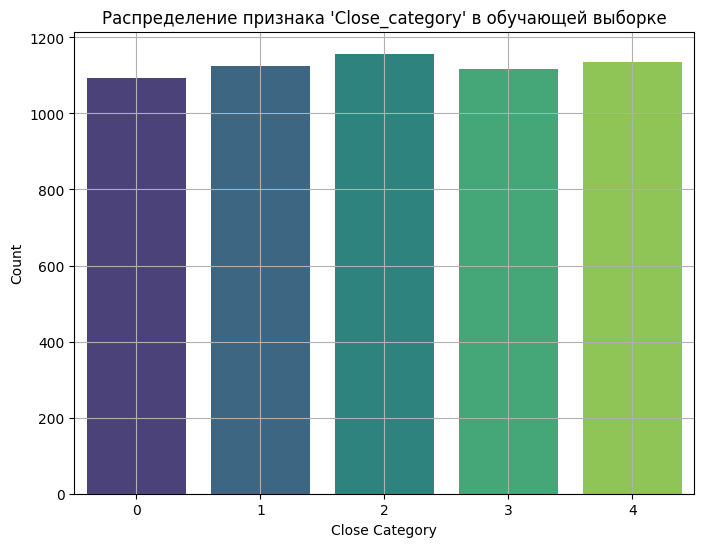

Распределение 'Close_category' в валидационной выборке:
 Close_category
0    263
1    242
3    238
4    238
2    224
Name: count, dtype: int64


C:\Users\TIGR228\AppData\Local\Temp\ipykernel_21436\2926621768.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


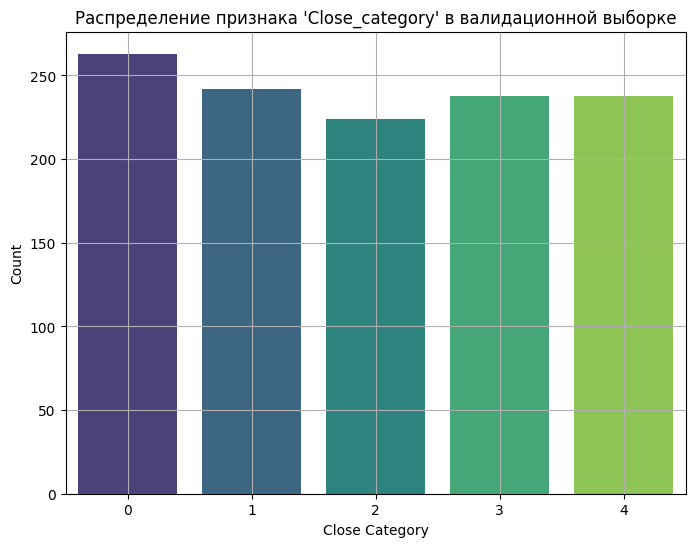

C:\Users\TIGR228\AppData\Local\Temp\ipykernel_21436\2926621768.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


Распределение 'Close_category' в тестовой выборке:
 Close_category
0    253
3    252
1    241
4    235
2    225
Name: count, dtype: int64


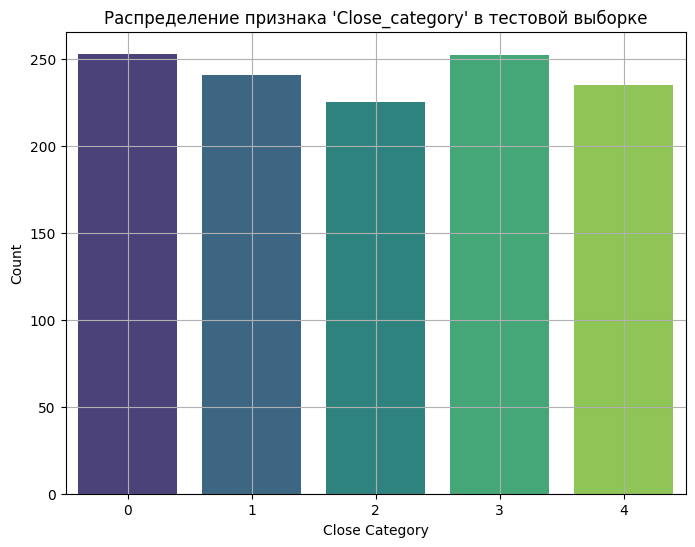

Проверка необходимости аугментации для признака 'Close_category' в обучающей выборке:
Минимальное количество наблюдений в классе: 1092
Максимальное количество наблюдений в классе: 1157
Выборка 'обучающей' сбалансирована, аугментация не требуется.

Проверка необходимости аугментации для признака 'Close_category' в валидационной выборке:
Минимальное количество наблюдений в классе: 224
Максимальное количество наблюдений в классе: 263
Выборка 'валидационной' сбалансирована, аугментация не требуется.

Проверка необходимости аугментации для признака 'Close_category' в тестовой выборке:
Минимальное количество наблюдений в классе: 225
Максимальное количество наблюдений в классе: 253
Выборка 'тестовой' сбалансирована, аугментация не требуется.

Распределение классов после SMOTE (oversampling):
Close_category
0    1157
1    1157
2    1157
3    1157
4    1157
Name: count, dtype: int64
Распределение классов после RandomUnderSampler (undersampling):
Close_category
0    1092
1    1092
2    1092
3   

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Логарифмирование целевой переменной
df['Close_log'] = np.log(df['Close'])

# Создание категорий для целевой переменной
df['Close_category'] = pd.qcut(df['Close_log'], q=5, labels=[0, 1, 2, 3, 4])

# Выбор признаков и целевой переменной
X = df.drop(['Close', 'Close_log', 'Close_category'], axis=1)
y = df['Close_category']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def analyze_close_category_distribution(data, name):
    """Проверка и визуализация распределения признака 'Close_category'"""
    category_counts = data.value_counts()
    print(f"Распределение 'Close_category' в {name} выборке:\n", category_counts)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title(f"Распределение признака 'Close_category' в {name} выборке")
    plt.xlabel('Close Category')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

analyze_close_category_distribution(y_train, 'обучающей')
analyze_close_category_distribution(y_val, 'валидационной')
analyze_close_category_distribution(y_test, 'тестовой')

def check_close_category_augmentation(data, name):
    print(f"Проверка необходимости аугментации для признака 'Close_category' в {name} выборке:")
    min_count = data.value_counts().min()
    max_count = data.value_counts().max()
    print(f"Минимальное количество наблюдений в классе: {min_count}")
    print(f"Максимальное количество наблюдений в классе: {max_count}")

    if max_count > min_count * 1.5:
        print(f"Выборка '{name}' несбалансирована, рекомендуется аугментация.\n")
    else:
        print(f"Выборка '{name}' сбалансирована, аугментация не требуется.\n")

check_close_category_augmentation(y_train, 'обучающей')
check_close_category_augmentation(y_val, 'валидационной')
check_close_category_augmentation(y_test, 'тестовой')

# Применение SMOTE для oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())

# Применение RandomUnderSampler для undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Распределение классов после RandomUnderSampler (undersampling):")
print(pd.Series(y_train_under).value_counts())


В этом исследование данные сбалансированы, поэтому аугментация не требуется .